In [1]:
from typing import Optional, List
from itertools import product
from importlib import reload

from numpy import sqrt
import pandas as pd
import xarray as xr
xr.set_options(keep_attrs=True,
               display_expand_data=False)

import plotly.express as px
import plotly.io as pio

from data import build_dataset_with_composites, get_factor_master, build_factor_data2
from stats import total_return
from util import format_date

from market_feedback import  draw_market_feedback_scatter, draw_market_feedback_scatter_set #px_scatter,



In [2]:
from importlib import reload

In [3]:
from util import summarize_memory_usage
summarize_memory_usage()

Process usage        0.148
System available     7.175
System total        31.710
Name: Memory Usage (GB), dtype: float64

In [4]:
import psutil
memory_info = psutil.Process().memory_info()
# return int(memory_info.rss / 1024 ** 2) + 1
print(f"Memory usage: {memory_info.rss / 1024 ** 2:.2f} MB")
# print(f:)



Memory usage: 153.26 MB


In [5]:
halflifes = [21, 63, 126, 252]
factor_data = build_factor_data2(halflifes, factor_set='read')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

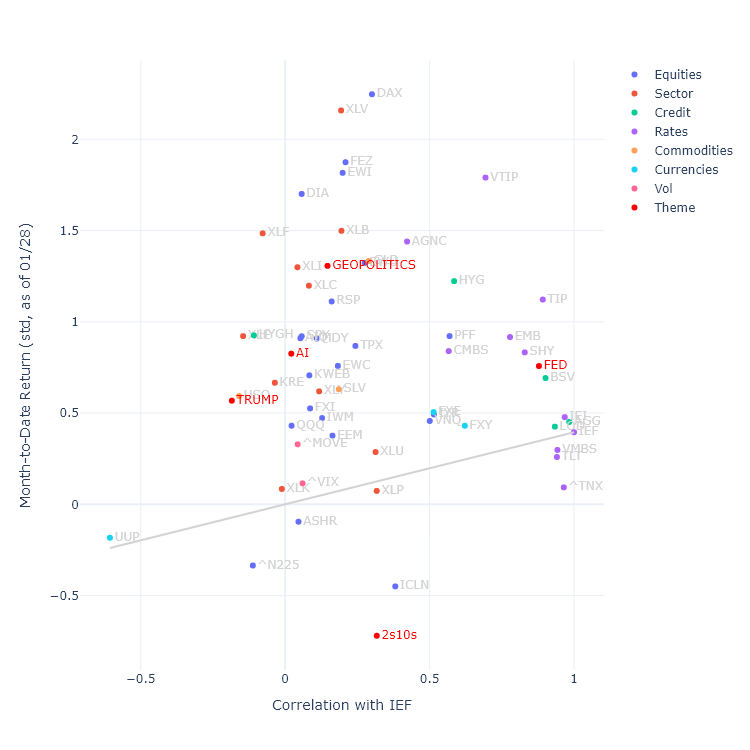

In [6]:
return_start = '2024-12-31'
return_end = '2025-01-28'
return_title = f'Month-to-Date Return (std, as of {format_date(return_end)})'

# return_start = '2025-01-21'
# return_end = '2025-01-28'
# return_title = f'5-day Return (std, {format_date(return_start)} - {format_date(return_end)})'

vol_type = 63
corr_type = 63
corr_asset = 'IEF'

fig = draw_market_feedback_scatter(factor_data, return_start, return_end, vol_type, corr_type, corr_asset, return_title)
fig.show(renderer='png')
# fig.write_html('fed_feedback.html')
# fig.write_image('fed_feedback.png')


# Loop through market feedback

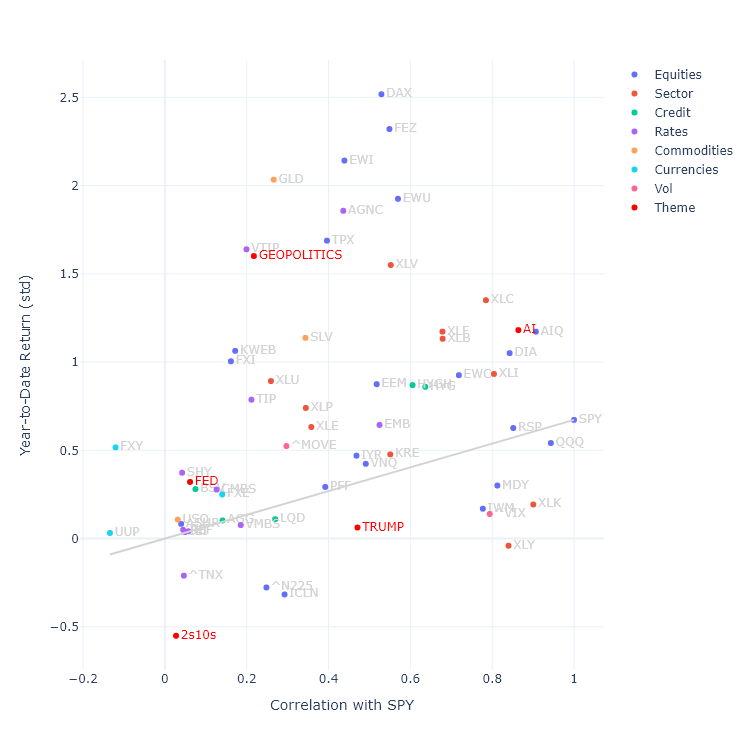

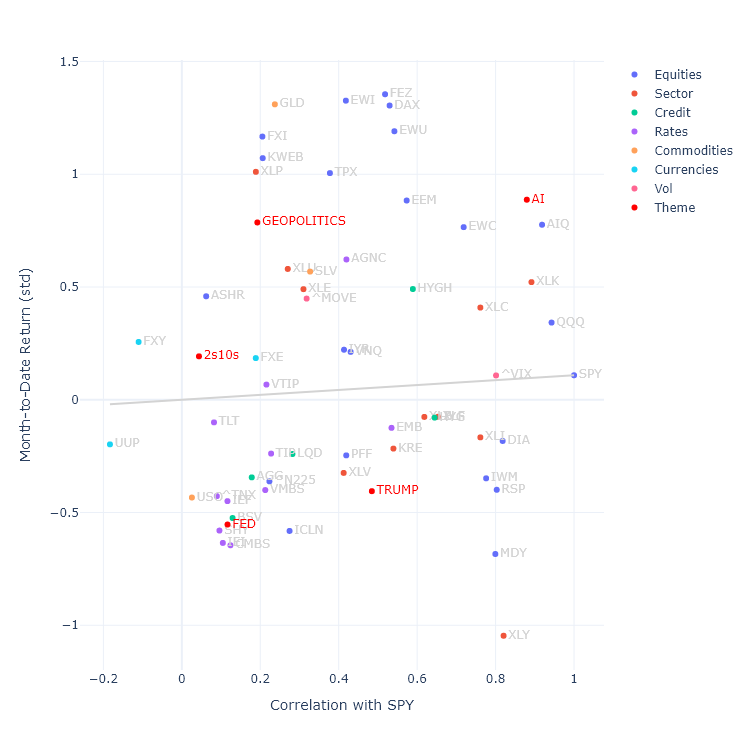

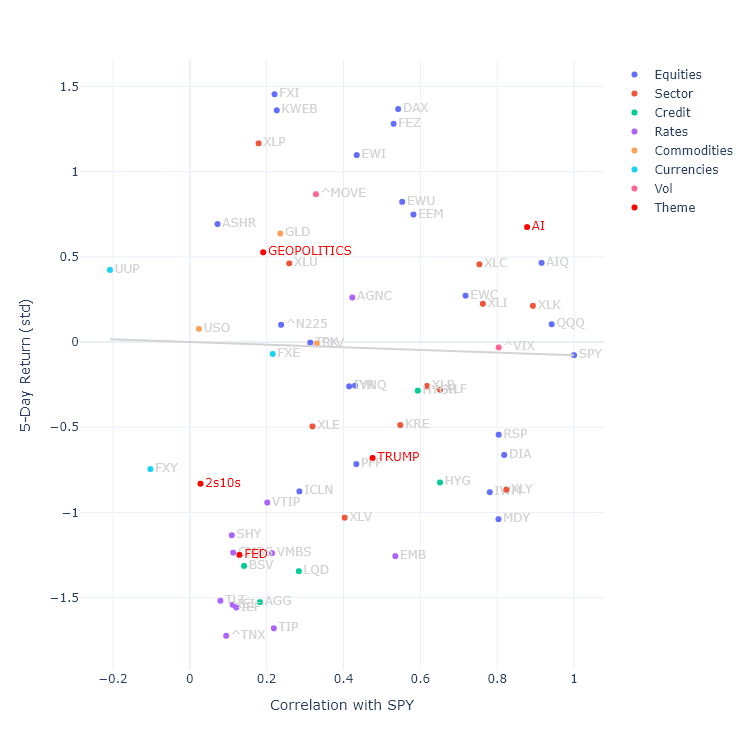

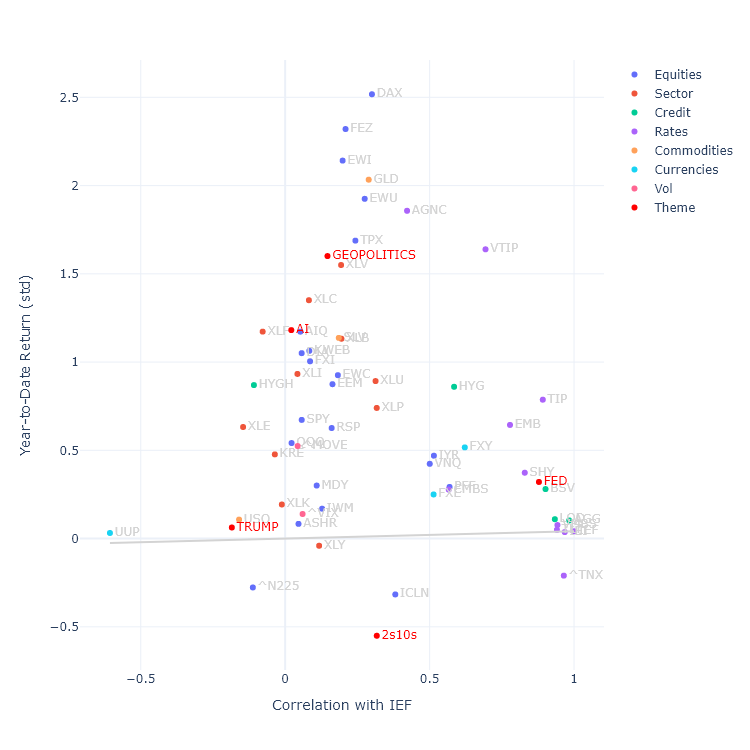

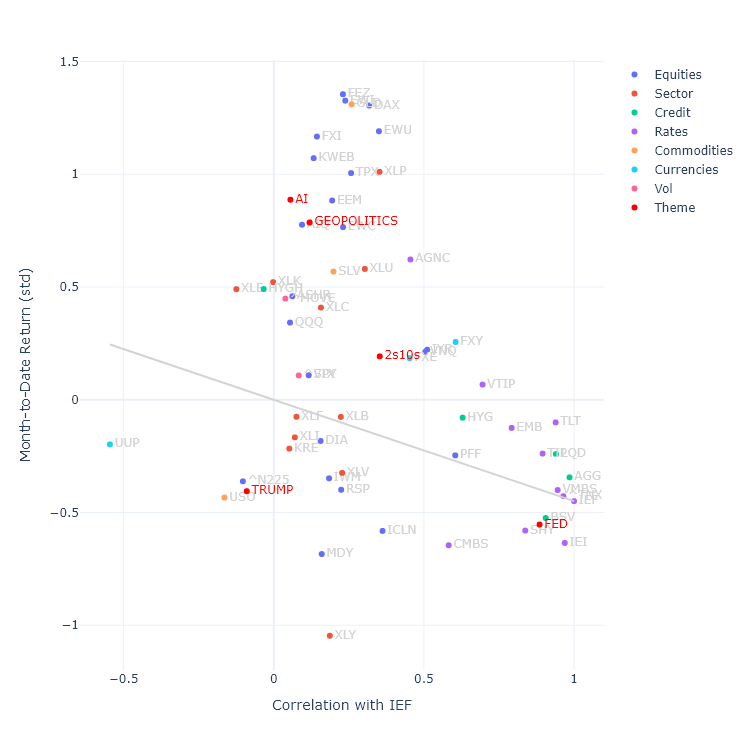

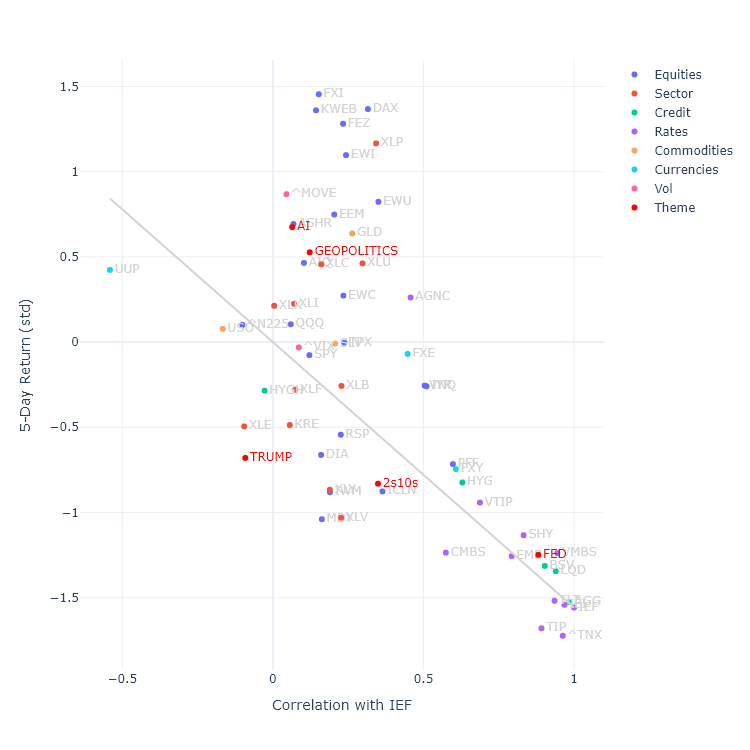

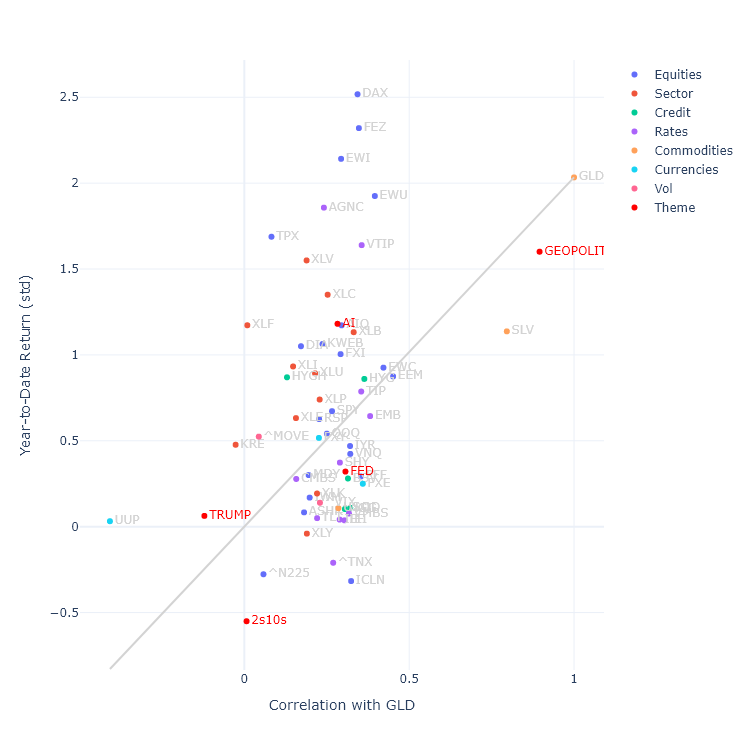

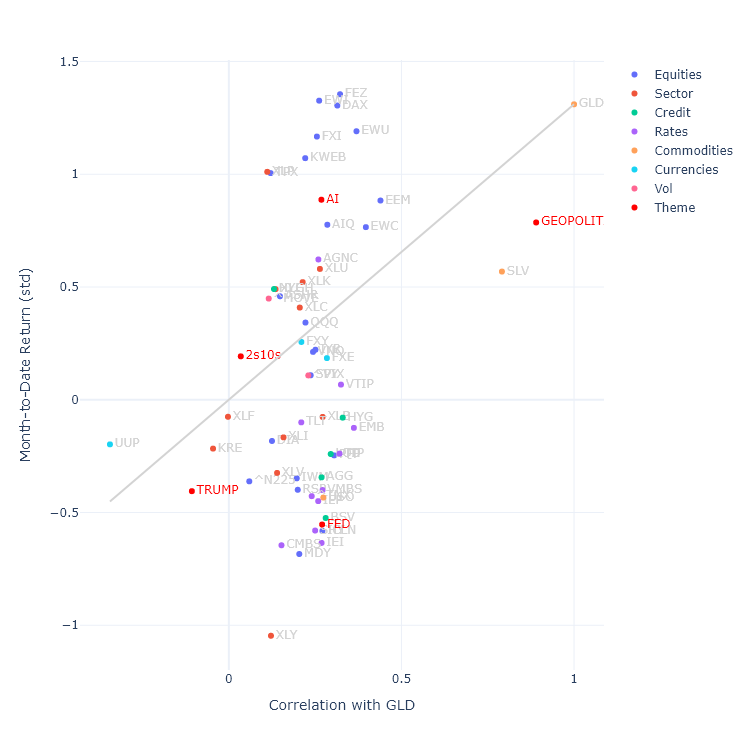

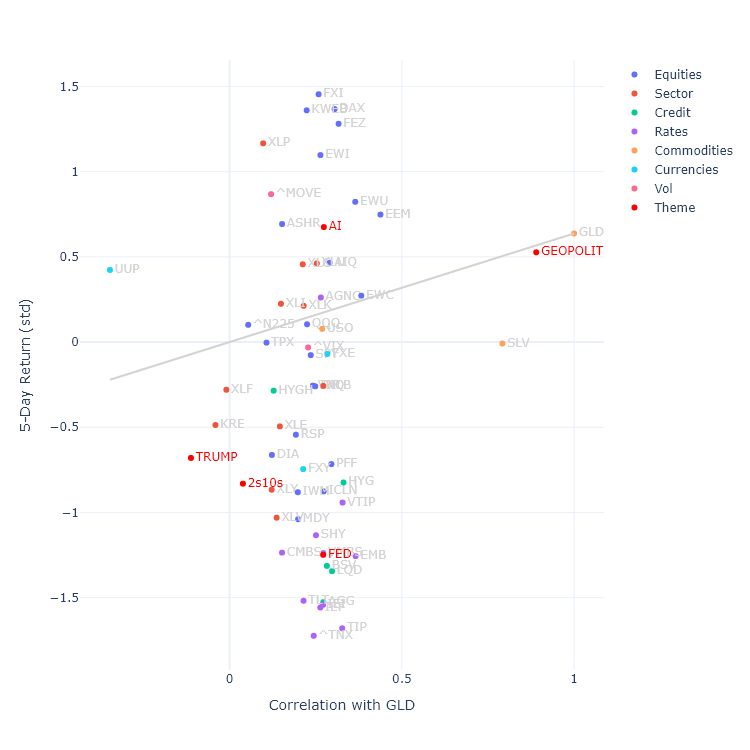

In [7]:
corr_asset_list = ['SPY', 'IEF', 'GLD']
vol_type  = 63
corr_type = 63
draw_market_feedback_scatter_set(factor_data, corr_asset_list, vol_type, corr_type)

# Correlation Matrix

In [8]:
def sort_assets(corr: pd.DataFrame, sorting_factor: str, factor_master: pd.DataFrame) -> pd.Index:
    df = (corr[[sorting_factor]]
          .join(factor_master[['asset_class', 'hyper_factor']])
          .assign(is_theme=lambda df: df['asset_class'] == 'Theme')
          .assign(is_sorting_factor=lambda df: df.index == sorting_factor)
          )
    sorted_index = df.sort_values(by=['is_sorting_factor', 'hyper_factor', 'is_theme', sorting_factor], 
                                  ascending=[False, False, True, False], key=abs).index
    return sorted_index


In [9]:
date_latest = factor_data.date.max().values
corr = factor_data.corr.sel(corr_type=corr_type, date=date_latest).to_pandas()

corr

def format_corr_matrix(corr: pd.DataFrame): # -> pd.io.formats.style.Styler:
    """
    Format the correlation matrix by adding asset class information and sorting.
    
    Parameters
    ----------
    corr : pd.DataFrame
        The correlation matrix with assets as both rows and columns.
    
    Returns
    -------
    pd.io.formats.style.Styler
        The formatted correlation matrix as a pandas Styler object.
    """
    # Sort the correlation matrix by asset class
    corr = corr
    
    # Style the correlation matrix
    styled_corr = corr.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).format(precision=2)
    
    return styled_corr

# Apply the function to format the correlation matrix
formatted_corr = format_corr_matrix(corr) #, factor_master['asset_class'])
formatted_corr



In [10]:
factor_master = pd.DataFrame(factor_data.factor_name.attrs).T

date_t0 = factor_data.date.max().values
# date_t0 = factor_data.date[-2].values
date_t1  =factor_data.date[-63].values

corr_t0 = factor_data.corr.sel(corr_type=corr_type, date=date_t0).to_pandas()
corr_t1 = factor_data.corr.sel(corr_type=corr_type, date=date_t1).to_pandas()
corr_diff = corr_t0 - corr_t1
sorted_index = sort_assets(corr_t0, '2s10s', factor_master)
sorted_index_chg = sort_assets(corr_diff, '2s10s', factor_master)

format_corr_matrix(corr.loc[sorted_index, sorted_index])
format_corr_matrix(corr_diff.loc[sorted_index_chg, sorted_index_chg])

# Draw correlation time series

In [11]:
factor_data

<xarray.Dataset> Size: 1GB
Dimensions:        (date: 8066, factor_name: 62, vol_type: 4,
                    factor_name_1: 62, corr_type: 4)
Coordinates:
  * date           (date) datetime64[ns] 65kB 1993-01-29 ... 2025-02-12
  * factor_name    (factor_name) object 496B 'SPY' 'IWM' ... '2s10s'
  * vol_type       (vol_type) int64 32B 21 63 126 252
  * factor_name_1  (factor_name_1) object 496B 'SPY' 'IWM' ... '2s10s'
  * corr_type      (corr_type) int64 32B 21 63 126 252
Data variables:
    ret            (date, factor_name) float64 4MB nan nan nan ... -54.43 -17.07
    cret           (date, factor_name) float64 4MB nan nan nan ... 100.0 100.0
    vol            (vol_type, date, factor_name) float64 16MB nan nan ... 4.32
    corr           (corr_type, date, factor_name, factor_name_1) float64 992MB ...

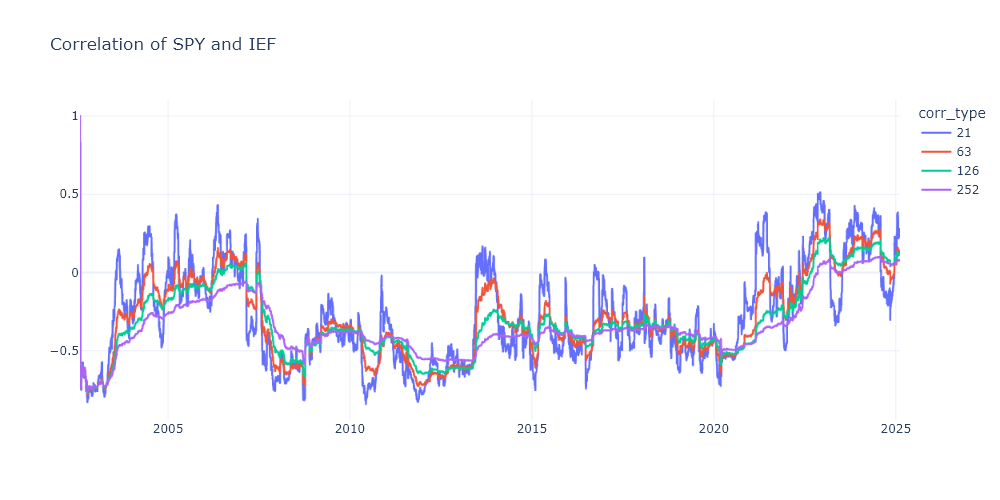

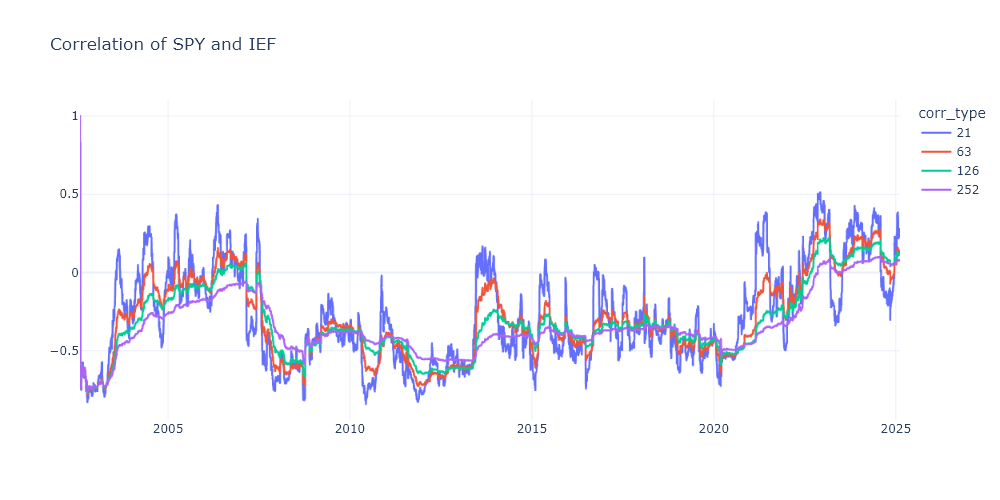

In [12]:
asset1 = 'SPY'
asset2 = 'IEF'
start_date = '2020'
start_date = None


df1  = factor_data.sel(factor_name=asset1, factor_name_1=asset2, date=slice('2024', None)).corr.to_pandas().T.stack()

from chart import draw_correlation, draw_volatility

fig1 = draw_correlation(factor_data.corr.sel(date=slice(start_date, None)), asset1, asset2, [21, 63, 126, 252])
fig1.show(renderer='png')

fig2 = draw_volatility(factor_data.vol.sel(date=slice(start_date, None)), asset1, [21, 63, 126, 252])
fig3 = draw_volatility(factor_data.vol.sel(date=slice(start_date, None)), asset2, [21, 63, 126, 252])

fig2.show()
fig3.show()

fig1.show(renderer='png')
# fig1.write_html('corr_ts.html')
# fig1.write_image('corr_ts.png')


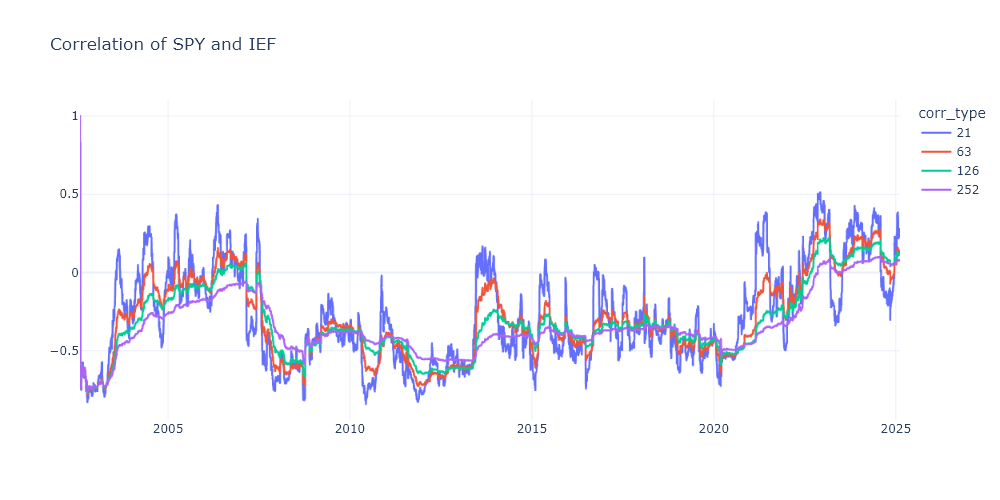

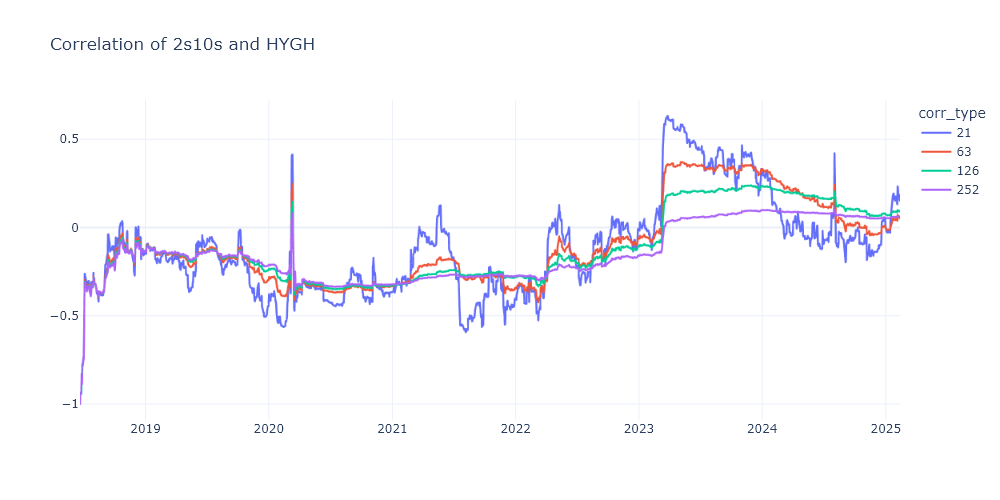

In [13]:
start_date = '2015'
start_date = None

corr_pairs = [('SPY', 'IEF'),
            #   ('SHY', 'IEF'), 
            #   ('2s10s', 'SPY'), 
            #   ('2s10s', 'IEF'), 
              ('2s10s', 'HYGH'), 
            #   ('2s10s', 'HYG'), 
            #   ('2s10s', 'LQD'), 
            #   ('2s10s', 'LQDH'), 
            #   ('2s10s', 'VMBS'), 
            #   ('2s10s', 'AGNC')
              ]

for asset1, asset2 in corr_pairs:
    fig = draw_correlation(factor_data.corr.sel(date=slice(start_date, None)), asset1, asset2, [21, 63, 126, 252])
    fig.show(renderer='png')
    # fig.write_html(f'corr_{asset1}_{asset2}.html')
    # fig.write_image(f'corr_{asset1}_{asset2}.png')

In [14]:
fig1.write_html('corr_ts.html')
fig1.write_image('corr_ts.png')

fig.write_html('fed_feedback.html')
fig.write_image('fed_feedback.png')

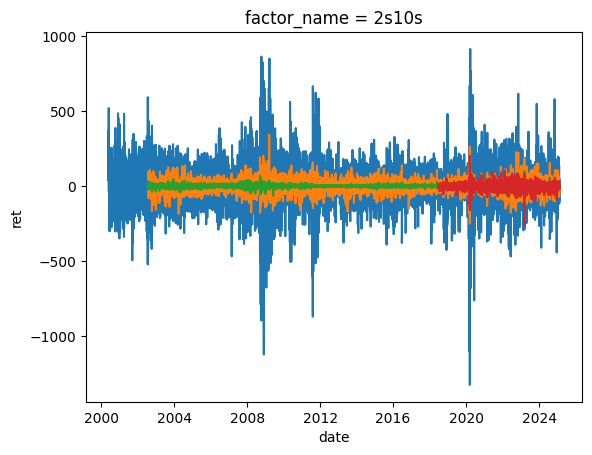

In [20]:
# factor_data.ret.sel(factor_name=[asset1, asset2]).plot(hue='asset')
factor_data.ret.sel(factor_name='IWM').plot()
factor_data.ret.sel(factor_name='IEF').plot()
factor_data.ret.sel(factor_name='SHY').plot()

factor_data.ret.sel(factor_name='2s10s').plot()